In [1]:
#importing required libraries
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE

In [2]:
#initializing the random number generator
random.seed(41)

<h3 style="color:#AF30F0;" >1) One hot encoding modelin görmediği veriye nasıl uygulanır?</h3>

one hot encoding işlemi uygulandığında eğitim veri seti ile test veri setinin sütun sayısı birbirine eşit olmayabilir. Bunun başlıca sebebi eğitim verisinin test verisine kıyasla çok daha fazla satır içermesinden kaynaklanmaktır. Bu sebeple çoğunlukla test veri setine OHE uygulandığında eğitim setine kıyas ile daha az sütun oluşur. Test veri seti her ne kadar daha az veri içerse de bazı durumlarda eğitim veri setinin daha önce karşılaşmadığı değerlere de sahip olabilir. Her iki durumda OHE işlemi sonucunda birbirinden farklı sayıda sütun içeren eğitim ve test veri setleri oluşmasına sebep olmaktadır. 

Böyle bir durumun önüne geçmek için eğitim veri seti ile test verisinin sütunları karşılaştırılarak test verisinin sahip olmadığı sütunlar test verisine eklebilir ve eğitim verisinin sahip olmadığı sütunlarda eğitim verisine eklebilir.

Tüm bu işlemler sonucunda bir model eğitildiğinde modele yeniden modelin daha önce hiç karşılaşmadığı değerler gelebilir. Bu değeri eğitim veri setine eklemek ve modeli yeniden eğitmek uzun çoğu zaman zahmetli bir iş olacağı gibi modele sokulan yeni değeri sonucu bilinmiyorsa sonucu bilinmeyen bir veri ile modeli eğitmek de mantıklı olmayacaktır. 

<h4 style="color:#FF30A0;">Çözüm önerileri </h4>
<ol>
  <li>eğitim setinde olmasa dahi test ve validation veri setleri içinde olması beklenen veriler daha öncesinden modele tanıtılabilir</li>
  <ul>
      <li>örneğin OHE uygulanacak sütun türkiyedeki şehir isimlerini tutuyorsa ve eğitim veri setinde sadece 30 il var ise geri kalan 51 il için boş sütunlar oluşturulabilir. Oluşacak bütün sütunlar eğitim veri setinde olmadığı için diğer başlığı altında toplanabilir</li>
  </ul>
  <br>
  <li>gelebilecek olası durumları daha önceden bilmek mümkün değil ise beklenmeyen başlıklı bir sütun oluşturulabilir</li>
</ol>


In [3]:
#Generating reference list to create dataframe
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'white', None]
results = [0, 1]

#random data
data_amount = 20
data = {
        'color': [random.choice(colors) for _ in range(data_amount)], 
        'result': [random.choice(results) for _ in range(data_amount)]
       }

In [4]:
#creating data frame
df =pd.DataFrame(data)

In [5]:
#selecting features and target

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
#split data as train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
#apply OHE to train data
pd.get_dummies(X_train)

,color_black,color_blue,color_green,color_pink,color_red,color_white,color_yellow
8,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0
11,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0
18,0,0,1,0,0,0,0
16,0,0,0,1,0,0,0
13,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1
19,0,0,0,0,1,0,0


<p style="color:#FF30A0; font-size:16px; font-style: oblique;">Olası kategoriler önceden tanımlanmadan yapılan OHE</p>

In [8]:
pd.get_dummies(X_test)

,color_black,color_blue,color_red,color_white
0,0,0,0,1
17,0,0,1,0
15,0,1,0,0
1,1,0,0,0


<p style="color:#FF30A0; font-size:16px; font-style: oblique;">Olası kategoriler tanımlandıktan sonra yapılan OHE</p>

In [9]:
from pandas.api.types import CategoricalDtype

color_type = CategoricalDtype(df.color.dropna().unique(), ordered=True)
X_test.color = X_test.color.astype(color_type)
pd.get_dummies(X_test)

,color_white,color_black,color_yellow,color_blue,color_pink,color_red,color_green
0,1,0,0,0,0,0,0
17,0,0,0,0,0,1,0
15,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0


<h3 style="color:#AF30F0;" >2) Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)</h3>

Label encoding'de doğru bir ölçeklendirme yapabilmek için öncelikli olarak değerler arasında mantıksal bir sıralama olup olmadığı incelenmelidir. Değerler arasında mantıksal bir ilişki bulunamadığı durumlarda değerlerin sonuca etkisi göz önüne alınarak numaralandırma yapılabilir.

<p style="color:#FF30A0; font-size:16px; font-style: oblique;">Basic LE</p>

In [10]:
df.loc[df.color.isnull(), 'color'] = "unk"
df['color_le'] = LabelEncoder().fit_transform(df['color'])
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
color,white,black,yellow,blue,white,pink,pink,white,red,yellow,red,unk,blue,blue,black,blue,pink,red,green,red
result,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
color_le,6,0,7,1,6,3,3,6,4,7,4,5,1,1,0,1,3,4,2,4


<p style="color:#FF30A0; font-size:16px; font-style: oblique;">manual LE</p>

In [11]:
#Generating reference list to create dataframe
colors = ['Low', 'Medium', 'High', 'Very High', 'Very Low']
results = [0, 1]

#random data
data_amount = 15
data = {
        'quality': [random.choice(colors) for _ in range(data_amount)], 
        'result': [random.choice(results) for _ in range(data_amount)]
       }
df =pd.DataFrame(data)
df["quality_le"] = df["quality"].replace({'Very Low': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4})
df = df[['quality', "quality_le", "result"]]
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
quality,High,Very High,Medium,Low,Low,Very High,Low,Very High,Very High,Medium,Low,Low,Medium,Low,Very High
quality_le,3,4,2,1,1,4,1,4,4,2,1,1,2,1,4
result,1,1,1,0,0,1,1,0,0,0,0,0,0,1,0


<h3 style="color:#AF30F0;" >3) Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?</h3>

* Eğitim ve test'in target sütununun eşit oranda dağılması gerekmetedir.
* Tahmin sonucu eğitim setindeki yüksek yoğunluklu veriyi bulma eğiliminde olabilir. Eğer beklentimiz düşük olasılığa sahip hedefi tespit etmek ise genel anlamda başarılı olan bir modelin düşük olasılıkta gerçekleşen olayı tahmin başarasının da beklentiyi karşılayıp karşılamadığı kontrol edilmelidir.
*Eğer veri seti dengelenmek isteniyorsa ve bunun için under sampling yapılacak ise veri setinden çıkarılan satırların önemli bilgiler içerip içermediğine dikkat edilmelidir.

<h3 style="color:#AF30F0;" >4) Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?</h3>

 validation dataset modelin gerçekte başarılı sonuç verip vermeyeceğini kontrol etmek amacı ile oluşturulacağından eğer veri setinde tarih bilgisi var ise tarih bilgisinden yararlanarak en son gerçekleşen olayların validation olarak ayrılabilir.
 
 validation dataset'in tahmin etmeye hazır hale getirilebilmesi için train ve test için model eğitilene kadar yapılan işlemlerin validation içinde uygulanması gerekmektedir.


<h3 style="color:#AF30F0;" >5) Predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?</h3>

sınıflandırma yaparken doğrudan sınıfı tahmin etmek yerine sınıfa ait olasılığı hesaplamak istediğimizde predict_proba'yı kullanabiliriz.

olasılığın 0 ve 1 arası değerler aldığı bir durumda treshold 0.5 olarak tanımlıdır. Treshold değerini düşürdüğümüzde modelimiz gerçekte sıfır olan değerleri kaçırmaya başlarken gerçekte 1 olan değerleri daha iyi yakalayacaktır. Trehold'u yükseltiğimizde ise gerçekte 1 olan değerleri model kaçırmaya başlarken 0 olan değerli daha iyi yakalayacaktır

In [12]:
#import iris data set
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

In [13]:
#desicion tree classifier
clf = tree.DecisionTreeClassifier()
model = clf.fit(X, y)
model.predict_proba(X)
model.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      ,  4.95000005,  1.65000004,
       -2.        , -2.        ,  1.55000001, -2.        ,  5.45000005,
       -2.        , -2.        ,  4.85000014,  5.95000005, -2.        ,
       -2.        , -2.        ])

In [14]:
#confusion matrix for default treshold
confusion_matrix(y, model.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [15]:
#changing treshold
model.tree_.threshold[3] = 0
model.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      ,  0.        ,  1.65000004,
       -2.        , -2.        ,  1.55000001, -2.        ,  5.45000005,
       -2.        , -2.        ,  4.85000014,  5.95000005, -2.        ,
       -2.        , -2.        ])

In [16]:
#confusion matrix for new treshold
confusion_matrix(y, model.predict(X))

array([[50,  0,  0],
       [ 0,  5, 45],
       [ 0,  1, 49]], dtype=int64)

<h3 style="color:#AF30F0;" >6) Fraud case'i üzerinde train test ve validation için split, encoding, scaling,modelleme çalışmaları yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği denemesi</h3>

In [17]:
df = pd.read_csv('auto_insurance_csv.csv')
df.columns

Index(['Unnamed: 0', 'months_as_customer', 'age', 'policy_number',
       'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [18]:
df = pd.read_csv('auto_insurance_csv.csv')

#cleaning
df = df.drop(['_c39','Unnamed: 0'], axis = 1)
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")
df['police_report_available'] = df.police_report_available.fillna("MISSING")
df['policy_csl'] = df.policy_csl.fillna("MISSING")
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days
df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)
df['umbrella_limit'] = df.umbrella_limit.astype(str)
umbrealla = df['umbrella_limit'].unique()

for umb in umbrealla:
    if (umb != '0.0') & (umb != '9999'):
        df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')
    
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
    if (hobby != 'chess') & (hobby != 'cross-fit'):
        df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)

required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']

df_selected_features = df[required_columns]

In [19]:
#separating the latest data as validation
df_val = df_selected_features.sort_values(by='incident_date',ascending=False).head(200)
df_train_test = df_selected_features.sort_values(by='incident_date',ascending=False).tail(800)

df_val = df_val.drop(["incident_date"],axis=1)
df_train_test = df_train_test.drop(["incident_date"],axis=1)

In [20]:
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
    df_train_test[col] = df_train_test[col].astype('object')

columns_to_encode = []
for col in df_train_test.columns:
    if (df_train_test[col].dtype == 'object'):
        columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'location_check',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [21]:
#one hot encode
df_one_hot_encoded = pd.get_dummies(df_train_test, columns = columns_to_encode)

df_one_hot_encoded.head()

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
511,446755,0,-46200,9,1,2,3,6560,2003,0,...,0,0,0,0,1,0,0,0,0,1
894,475891,0,0,6,1,1,3,6000,2000,0,...,0,0,0,0,1,0,0,1,0,0
125,603948,47200,-69700,12,3,2,3,36300,2013,0,...,0,0,0,0,1,0,0,0,0,1
895,462525,26500,0,23,3,0,3,55200,1998,1,...,0,0,0,0,1,0,0,1,0,0
485,471366,0,-31700,0,1,2,1,48290,1995,0,...,0,1,0,0,1,0,0,0,1,0


In [22]:
cols = df_one_hot_encoded.columns
num_cols = df_one_hot_encoded._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [23]:
#selecting features and target
features = []
for col in df_one_hot_encoded.columns:
    if col != 'fraud_reported':
        features.append(col)

target = 'fraud_reported'

X = df_one_hot_encoded[features]
y = df_one_hot_encoded[target]

In [24]:
#scaling
#sc = StandardScaler()
#sc = sc.fit(X)
#X_sc = sc.transform(X)

#normalize
norm = Normalizer()
norm = norm.fit(X)
X_norm = norm.transform(X)

C:\Users\misafir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

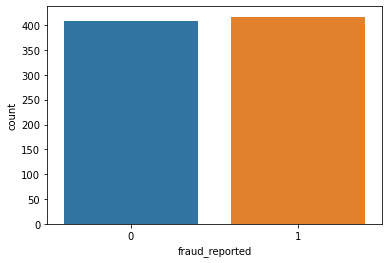

In [25]:
oversample = SMOTE(random_state=9)

X_over, y_over = oversample.fit_resample(X_norm, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

chck = pd.DataFrame()
chck['fraud_reported'] = y_train

sns.countplot(chck['fraud_reported'])

93.78531073446328

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       181
           1       0.90      0.98      0.94       173

    accuracy                           0.94       354
   macro avg       0.94      0.94      0.94       354
weighted avg       0.94      0.94      0.94       354



<AxesSubplot:>

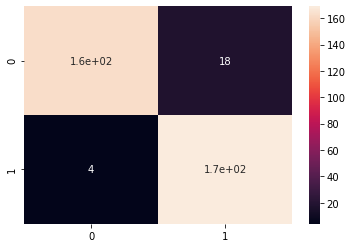

In [26]:
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sns
sns.heatmap(cm, annot=True)

In [27]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model


{'n_estimators': [300, 650, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [28]:
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': False}

In [29]:
rf_best = RandomForestClassifier(n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features='sqrt'
                            ,max_depth=17, bootstrap='True', random_state = 1)
rf_best.fit(X_train, y_train)

RandomForestClassifier(bootstrap='True', max_depth=17, max_features='sqrt',
                       min_samples_split=5, n_estimators=300, random_state=1)

92.93785310734464

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       181
           1       0.89      0.97      0.93       173

    accuracy                           0.93       354
   macro avg       0.93      0.93      0.93       354
weighted avg       0.93      0.93      0.93       354



<AxesSubplot:>

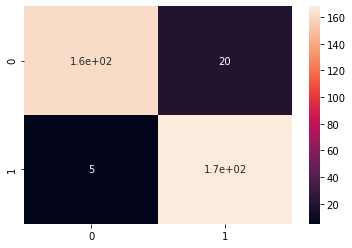

In [30]:
preds = rf_best.predict(X_test)

score = rf_best.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

<p style="color:#FF30A0; font-size:16px; font-style: oblique;"> Getting Validation Ready To Predict </p>

In [31]:
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
    df_val[col] = df_val[col].astype('object')

columns_to_encode = []
for col in df_val.columns:
    if df_val[col].dtype == 'object':
        columns_to_encode.append(col)

df_val_one_hot_encoded = pd.get_dummies(df_val, columns = columns_to_encode)
len(df_val_one_hot_encoded.columns)

170

In [32]:
cols = df_one_hot_encoded.columns
num_cols = df_val_one_hot_encoded._get_numeric_data().columns
missing_column = list(set(cols) - set(num_cols))
missing_column

['auto_model_Ultima',
 'location_check_True',
 'policy_annual_premium_groups_very high',
 'age_group_15-20',
 'policy_annual_premium_groups_very low']

In [33]:
for col in missing_column:
    df_val_one_hot_encoded[col] = np.zeros(len(df_val_one_hot_encoded))

len(df_val_one_hot_encoded.columns)

175

In [34]:
features = []
for col in df_val_one_hot_encoded.columns:
    if col != 'fraud_reported':
        features.append(col)
print(len(features))
target = 'fraud_reported'

X_val = df_val_one_hot_encoded[features]
y_val = df_val_one_hot_encoded[target]

174


In [35]:
X_val = norm.transform(X_val)

C:\Users\misafir\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


78.5
              precision    recall  f1-score   support

           0       0.95      0.79      0.86       163
           1       0.46      0.81      0.59        37

    accuracy                           0.79       200
   macro avg       0.70      0.80      0.72       200
weighted avg       0.86      0.79      0.81       200



<AxesSubplot:>

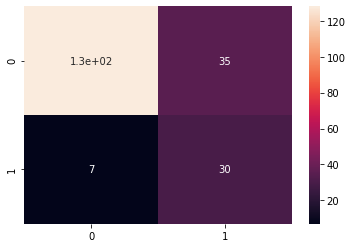

In [36]:
preds = rfc.predict(X_val)
score = rfc.score(X_val, y_val)
print(score*100)


threshold = 0.4

predicted_proba = rfc.predict_proba(X_val)
preds = (predicted_proba[: , 1] >= threshold).astype('int')

print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)